In [2]:
import fsps
from matplotlib import pylab as plt
import numpy as np
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.nan)
from scipy import integrate

In [3]:
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, zred = 0.,
                                sfh=3, logzsol=0.0, dust_type=2, dust2=0.2,add_igm_absorption= False)

In [4]:
sdss_bands = fsps.find_filter('sdss')

In [5]:
print(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [6]:
sp.set_tabular_sfh(np.ndarray((11,), buffer=np.array(np.linspace(0,1,11)),dtype=float), np.ndarray((11,), buffer=np.array(11*[5]),dtype=int))

In [12]:
#print (sp.sfr(tage=0.5))

In [7]:
print(sdss_bands)

['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']


In [8]:
sp.get_mags(tage=0.5, bands=sdss_bands)

array([ 28.17594137,  26.13334186,  25.75305122,  25.68640423,  25.66425939])

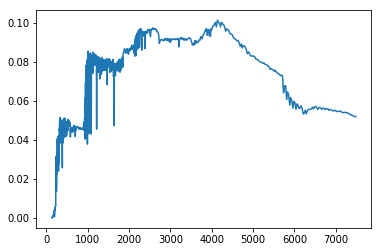

In [9]:
wave, spec = sp.get_spectrum(tage=0.5)
sed = spec*3.83*10**33/4/np.pi/(25924*10**6*3.08*10**18)**2/10**(-29)
sedlambda = spec*3.83*10**33
#plt.yscale('log')
#print(wave, sed)
plt.plot(wave[np.where((wave >= 500) & (wave <= 30000))]/4, sed[np.where((wave >= 500) & (wave <= 30000))])
plt.show()



In [10]:
filtername = ['wfc_acs_f435w','wfc_acs_f606w','wfc_acs_f775w','wfc_acs_f850lp','wfc3_ir_f105w','wfc3_ir_f125w',
             'wfc3_ir_f160w','jwst_f200w','jwst_f277w','jwst_f356w','jwst_f444w']
mag = sp.get_mags(tage=0.5, bands=filtername)
print (mag)

janskyflux = 10**((48.6+mag)/(-2.5))/10**(-29)
print (janskyflux)

[-20.39227101 -20.40637457 -20.47575605 -20.57799676 -20.59884717
 -20.57087148 -20.60353298 -20.48635863 -20.0122707  -20.30747853
 -19.64184572]
[  5.21084797e+17   5.27897770e+17   5.62733047e+17   6.18299227e+17
   6.30287751e+17   6.14254844e+17   6.33013820e+17   5.68255242e+17
   3.67204742e+17   4.81938267e+17   2.61058769e+17]


In [51]:
frequency = 3*10**18/(np.array(wave[np.where((wave >= 500) & (wave <= 25000))]))*4
print (frequency)


[  2.40000000e+16   2.37154150e+16   2.34375000e+16   2.30769231e+16
   2.26415094e+16   2.22222222e+16   2.18181818e+16   2.14285714e+16
   2.10526316e+16   2.06896552e+16   2.03389831e+16   2.00000000e+16
   1.96721311e+16   1.93548387e+16   1.90476190e+16   1.87500000e+16
   1.84615385e+16   1.82370821e+16   1.80451128e+16   1.77777778e+16
   1.75182482e+16   1.72661871e+16   1.70212766e+16   1.67597765e+16
   1.65289256e+16   1.63265306e+16   1.61073826e+16   1.58940397e+16
   1.56862745e+16   1.54838710e+16   1.52866242e+16   1.50943396e+16
   1.49068323e+16   1.47239264e+16   1.45454545e+16   1.43712575e+16
   1.42011834e+16   1.40350877e+16   1.38728324e+16   1.37142857e+16
   1.35593220e+16   1.34078212e+16   1.32596685e+16   1.31147541e+16
   1.29729730e+16   1.28342246e+16   1.26984127e+16   1.25654450e+16
   1.24352332e+16   1.23076923e+16   1.21827411e+16   1.20603015e+16
   1.19402985e+16   1.18226601e+16   1.17073171e+16   1.15942029e+16
   1.14832536e+16   1.13744076e+16

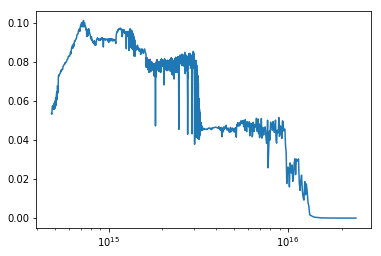

[  2.40000000e+16   2.37154150e+16   2.34375000e+16   2.30769231e+16
   2.26415094e+16   2.22222222e+16   2.18181818e+16   2.14285714e+16
   2.10526316e+16   2.06896552e+16   2.03389831e+16   2.00000000e+16
   1.96721311e+16   1.93548387e+16   1.90476190e+16   1.87500000e+16
   1.84615385e+16   1.82370821e+16   1.80451128e+16   1.77777778e+16
   1.75182482e+16   1.72661871e+16   1.70212766e+16   1.67597765e+16
   1.65289256e+16   1.63265306e+16   1.61073826e+16   1.58940397e+16
   1.56862745e+16   1.54838710e+16   1.52866242e+16   1.50943396e+16
   1.49068323e+16   1.47239264e+16   1.45454545e+16   1.43712575e+16
   1.42011834e+16   1.40350877e+16   1.38728324e+16   1.37142857e+16
   1.35593220e+16   1.34078212e+16   1.32596685e+16   1.31147541e+16
   1.29729730e+16   1.28342246e+16   1.26984127e+16   1.25654450e+16
   1.24352332e+16   1.23076923e+16   1.21827411e+16   1.20603015e+16
   1.19402985e+16   1.18226601e+16   1.17073171e+16   1.15942029e+16
   1.14832536e+16   1.13744076e+16

In [52]:
plt.xscale('log')
plt.plot(np.flipud(frequency), np.flipud(sed[np.where((wave >= 500) & (wave <= 25000))]))
plt.show()
sed2 = np.flipud(sed[np.where((wave >= 500) & (wave <= 25000))])
fre2 = np.flipud(frequency)
print (frequency)




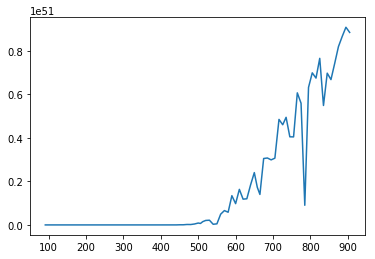

In [11]:
#create the function used to integrate

fint = sedlambda[np.where((wave >= 0) & (wave <= 912))]/(6.626*10**(-27))/wave[np.where((wave >= 0) & (wave <= 912))]

plt.plot(wave[np.where((wave >= 0) & (wave <= 912))], fint)
plt.show()

In [12]:
#integrate through the wavelenght 0 t0 912 A
photonrate = integrate.simps(fint, wave[np.where((wave >= 0) & (wave <= 912))] )

In [13]:
print (photonrate)

1.47234061733e+53
